# Beispiel mit Python 

## Imports

In [1]:
## imports
# Importing required libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
#matplotlib inline 
sns.set(color_codes=True)

# additonal libraries
from pathlib import Path

## Einfaches Beispiel

### Daten einlesen und anzeigen

In [2]:
path = "train.csv"
train=pd.read_csv(path)
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### einfache Plots 

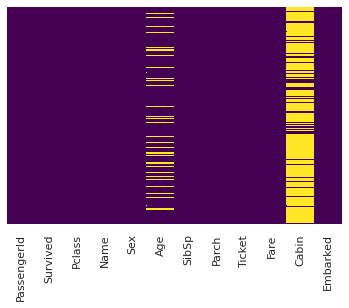

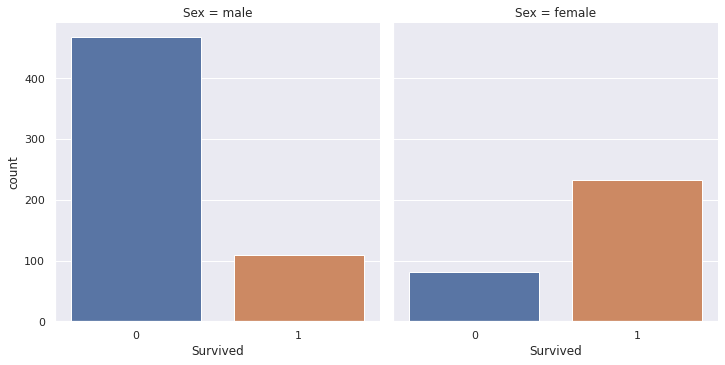

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.catplot(x='Survived',col='Sex',kind='count',data=train) # factorplot -> catplot
plt.show()

### Datensatz analysieren

In [13]:
# Datentypen analysieren 
train.dtypes

# Auf Duplikate prüfen
duplicate_rows_df = train[train.duplicated()]

# Folgende Ausgabe sollte die Anzahl der Duplikate in unserem Datensatz anzeigen.
# In unserem Fall 0
print("number of duplicate rows: ", duplicate_rows_df.shape, "\n")

# Auf null-Values prüfen 
print(train.count())
print("\n")
print(train.isnull().sum())

number of duplicate rows:  (0, 12) 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Boxplots erstellen

<AxesSubplot:xlabel='Age'>

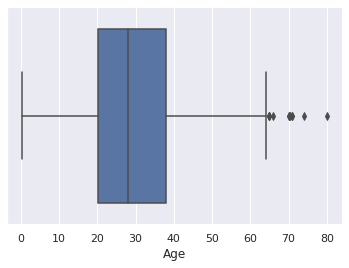

In [14]:
sns.boxplot(x=train['Age'])

### Kennwerte berechnen 

In [18]:
# Interquartilsdistanz
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Mittelwerte
train.mean()

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

### verschiedene Plots

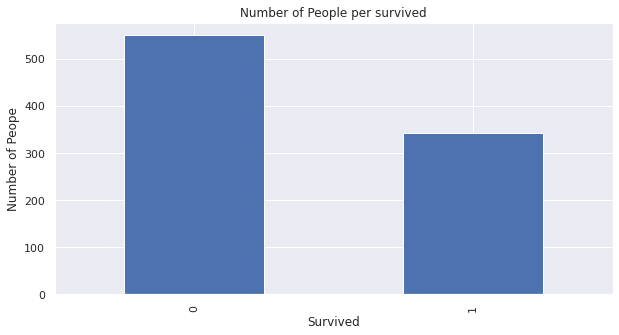

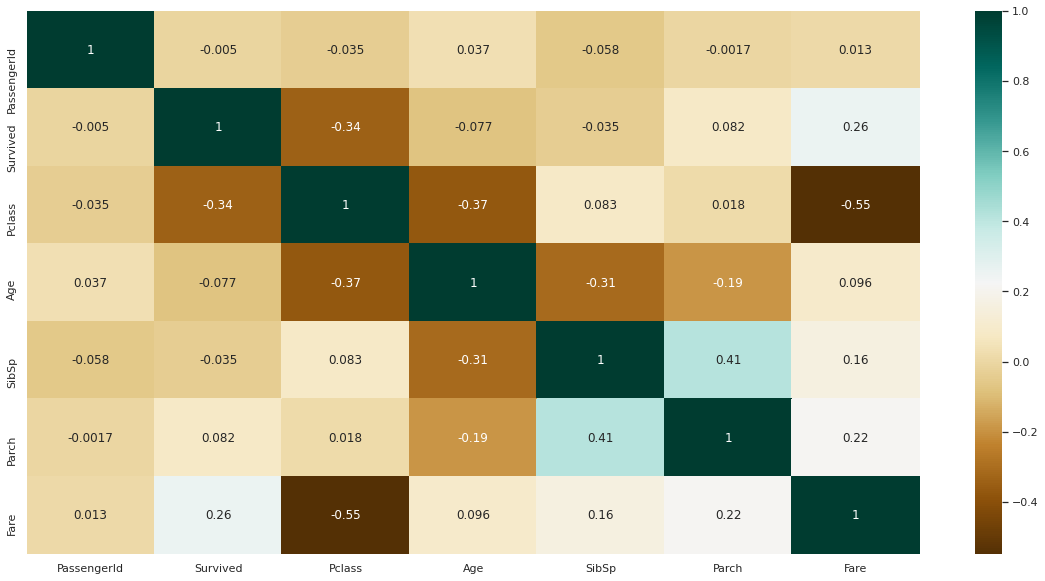

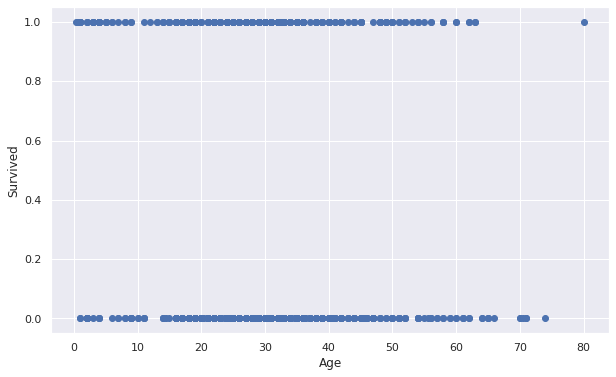

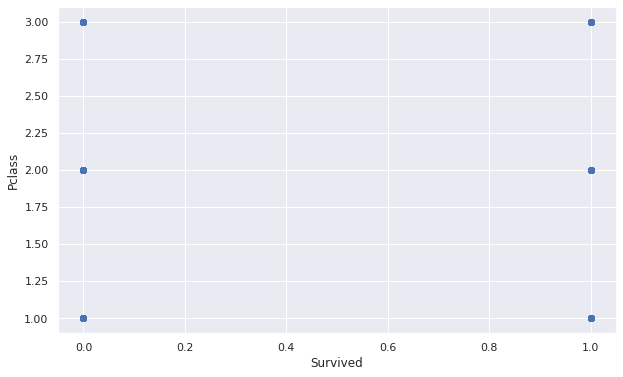

In [30]:
# Plotting histogram 
# Plotting a Histogram
train.Survived.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of People per survived")
plt.ylabel('Number of Peope')
plt.xlabel('Survived');

# Plotting heat maps
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['Age'], train['Survived'])
ax.set_xlabel('Age')
ax.set_ylabel('Survived')
plt.show()

# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['Survived'], train['Pclass'])
ax.set_xlabel('Survived')
ax.set_ylabel('Pclass')
plt.show()